In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('winequality-white.csv').dropna()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

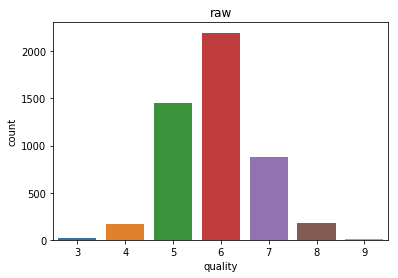

In [5]:
#For this first round, we attempt to do balancing

plt.figure()

sns.countplot('quality', data=df)

plt.title('raw')

plt.show()

In [6]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [7]:
#From graph, qualities 3 and 9 are too small. Therefore we do a mapping to convert them for dropping

dict_quality= {
    4: 4,
    5: 5,
    6: 6,
    7: 7,
    8: 8
}

df['quality'] = df['quality'].map(dict_quality)

#drop NaN columns
df = df.dropna()

df.quality.value_counts()

6.0    2198
5.0    1457
7.0     880
8.0     175
4.0     163
Name: quality, dtype: int64

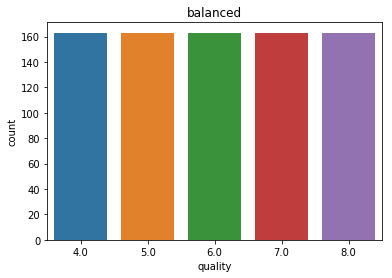

In [8]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the minority class in a separate dataset.
q4_df = shuffled_df.loc[shuffled_df['quality'] == 4]

#Randomly select ? observations from the majority classes
q5_df = shuffled_df.loc[shuffled_df['quality'] == 5].sample(n = 163,random_state=42)

q6_df = shuffled_df.loc[shuffled_df['quality'] == 6].sample(n = 163,random_state=42)

q7_df = shuffled_df.loc[shuffled_df['quality'] == 7].sample(n = 163,random_state=42)

q8_df = shuffled_df.loc[shuffled_df['quality'] == 8].sample(n = 163,random_state=42)


# Concatenate both dataframes again
normalized_df = pd.concat([q4_df, q5_df, q6_df, q7_df, q8_df])

plt.figure()

sns.countplot('quality', data=normalized_df)

plt.title('balanced')

plt.show()

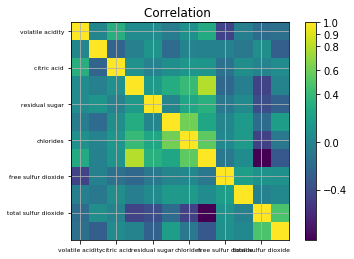

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

cax = ax1.imshow(normalized_df.corr(), interpolation="nearest")
ax1.grid(True)
plt.title('Correlation ')
labels=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
ax1.set_xticklabels(labels,fontsize=6)
ax1.set_yticklabels(labels,fontsize=6)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[-0.4,0,.4,.6,.8,.9,1])
plt.show()

In [10]:
normalized_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.016584,0.329899,0.056514,0.060271,-0.050574,0.089945,0.290890,-0.452254,-0.034397,-0.178733,-0.149701
volatile acidity,0.016584,1.000000,-0.224522,-0.030362,0.120079,-0.187926,-0.008338,-0.017716,-0.020118,-0.091873,0.075972,-0.270637
citric acid,0.329899,-0.224522,1.000000,0.098169,-0.013620,0.085717,0.132832,0.123602,-0.142096,0.080407,-0.007040,0.055588
residual sugar,0.056514,-0.030362,0.098169,1.000000,0.165737,0.307634,0.410608,0.800518,-0.202572,-0.044165,-0.447238,-0.007361
chlorides,0.060271,0.120079,-0.013620,0.165737,1.000000,0.006899,0.249668,0.336599,-0.095332,0.049257,-0.387237,-0.252224
free sulfur dioxide,-0.050574,-0.187926,0.085717,0.307634,0.006899,1.000000,0.609156,0.253535,0.009701,0.159906,-0.174681,0.193370
total sulfur dioxide,0.089945,-0.008338,0.132832,0.410608,0.249668,0.609156,1.000000,0.547447,0.029441,0.157182,-0.467077,-0.091645
density,0.290890,-0.017716,0.123602,0.800518,0.336599,0.253535,0.547447,1.000000,-0.094401,0.065005,-0.821279,-0.320873
pH,-0.452254,-0.020118,-0.142096,-0.202572,-0.095332,0.009701,0.029441,-0.094401,1.000000,0.198060,0.109663,0.093974
sulphates,-0.034397,-0.091873,0.080407,-0.044165,0.049257,0.159906,0.157182,0.065005,0.198060,1.000000,-0.021512,0.028819


# PCA


In [4]:
from sklearn.preprocessing import StandardScaler
#Separating out the features
features = ['volatile acidity','chlorides','density','alcohol']

#choose all features
# features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
# Separating out the features
x_pca = df.loc[:, features].values
print(x_pca.shape)
#Separating out the target
y_pca = df.loc[:,['quality']].values
#standardizing the features
x_afterscaled = StandardScaler().fit_transform(x_pca)


(4898, 4)


In [5]:
x_afterscaled.shape

(4898, 4)

In [6]:
pd.DataFrame(data=x_afterscaled, columns=features).head()

,volatile acidity,chlorides,density,alcohol
0,-0.081770,-0.035355,2.331512,-1.393152
1,0.215896,0.147747,-0.009154,-0.824276
2,0.017452,0.193523,0.358665,-0.336667
3,-0.478657,0.559727,0.525855,-0.499203
4,-0.478657,0.559727,0.525855,-0.499203


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x_afterscaled)
principaldf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principaldf.head()

,principal component 1,principal component 2
0,2.376663,-0.384735
1,0.596568,0.142115
2,0.527496,0.009495
3,0.889260,-0.388614
4,0.889260,-0.388614


In [8]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [10]:
print(principaldf.shape)
print(df['quality'].shape)

#change into numpy array
combined_arr = np.concatenate((principaldf.values,df[['quality']]), axis=1 )

#change back into dataframe
finalDf = pd.DataFrame(combined_arr, columns=['principal component 1','principal component 2','quality'])


print(finalDf.shape)
finalDf.head()

(4898, 2)
(4898,)
(4898, 3)


,principal component 1,principal component 2,quality
0,2.376663,-0.384735,6.0
1,0.596568,0.142115,6.0
2,0.527496,0.009495,6.0
3,0.889260,-0.388614,6.0
4,0.889260,-0.388614,6.0


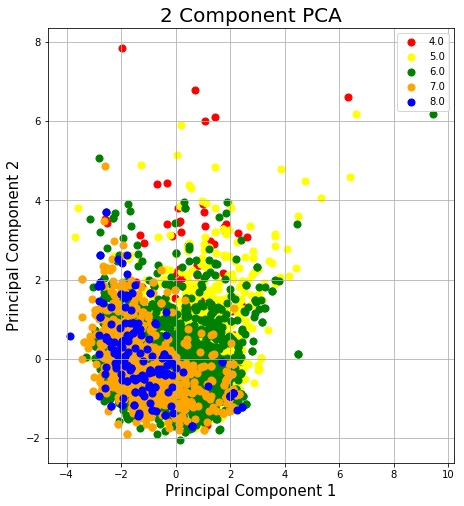

In [11]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1) 
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)

targets = [4.0,5.0,6.0,7.0,8.0]
colors = ['red','yellow','green','orange','blue']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['quality'] == target
    ax1.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax1.legend(targets)
ax1.grid()

In [13]:
print(pca.explained_variance_ratio_)

print(pca.explained_variance_ratio_.sum())

[0.49400511 0.25709471]
0.7510998244967764


That means this data is not really giving a good accuracy score when we use classification techniques
Can justify when trying to use classification technique and see what the accuracy score is. 
Accuracy score should not be that high

# DBSCAN 

[ 9.68403977e-02 -3.37455481e-01  4.97728901e-01  1.47990573e+00
  1.43313541e+00 -4.37677607e-01 -2.37233355e-01  1.44315762e+00
  4.30914151e-01 -1.45994329e+00 -3.37455481e-01  4.84365951e-01
 -8.18521685e-01  1.56008344e+00 -1.10285329e-01  1.55340196e+00
  3.00256471e-02  1.33291328e+00 -1.17263986e+00  1.63655148e-01
 -5.71307108e-01  3.00256471e-02 -2.37233355e-01 -9.65514136e-01
  4.37595626e-01 -1.43692704e-01 -3.38172817e-03  1.56676491e+00
 -7.88455047e-01  1.64694261e+00  9.68403977e-02 -5.54603420e-01
 -8.21862423e-01 -4.57722032e-01 -1.97144505e-01 -9.72195612e-01
  6.31358402e-01 -1.17263986e+00 -7.01964787e-02 -3.67891035e-02
 -2.23870405e-01 -1.33967674e+00  6.98173153e-01  3.64099400e-01
  2.30469899e-01 -3.44136956e-01  2.97284649e-01  1.39972803e+00
  2.23491242e+00  4.77684476e-01  3.30692025e-01  4.64321526e-01
  1.16587641e+00  1.39972803e+00 -9.25425286e-01  8.31802654e-01
  1.29950591e+00  1.63357966e+00  6.17995452e-01  8.65210029e-01
  1.29950591e+00  9.68403

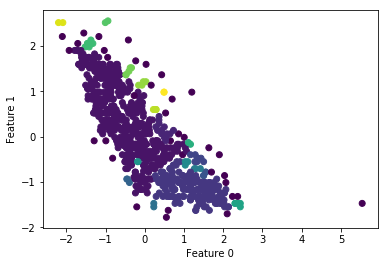

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

#Separating out the features
features = ['density','alcohol']
x_dbscan = normalized_df.loc[:, features].values
#Separating out the target
y_pca = normalized_df.loc[:,['quality']].values
#standardizing the features
x_std = StandardScaler().fit_transform(x_dbscan)


# cluster the data
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(x_std)

# plot the cluster assignments
print(x_std[:,0])
print(x_std[:,1])
plt.scatter(x_std[:, 0], x_std[:, 1], c=clusters)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.show()

In [56]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f'Number of clusters = {n_clusters_}')
print(f'Number of noise sample = {n_noise_}')

Number of clusters = 19
Number of noise sample = 35
